In [9]:
from kestrix.params import *
import os
from pathlib import Path
import tensorflow as tf
from keras_cv import visualization
from kestrix.visualization import visualize_bounding_box

In [10]:
def parse_annotation(txt_file, folder_path):
    with open(txt_file) as file:
        lines = file.readlines()
        file_name = Path(file.name).stem

    image_path = os.path.join(folder_path, file_name + ".JPG")
    boxes = []
    class_ids = []
    for line in lines:
        line = line.split()

        cls = float(line[0])
        class_ids.append(cls)

        x_min = float(line[1])
        y_min = float(line[2])
        x_max = float(line[3])
        y_max = float(line[4])

        boxes.append([x_min, y_min, x_max, y_max])

    return image_path, boxes, class_ids

In [11]:
path = "../data/package_testing"

In [12]:
txt_files = sorted(
    [
        os.path.join(path, file_name)
        for file_name in os.listdir(path)
        if file_name.endswith(".txt")
    ]
)

image_paths = []
bbox = []
classes = []
for txt_file in txt_files:
    image_path, boxes, class_ids = parse_annotation(txt_file, path)
    image_paths.append(image_path)
    bbox.append(boxes)
    classes.append(class_ids)

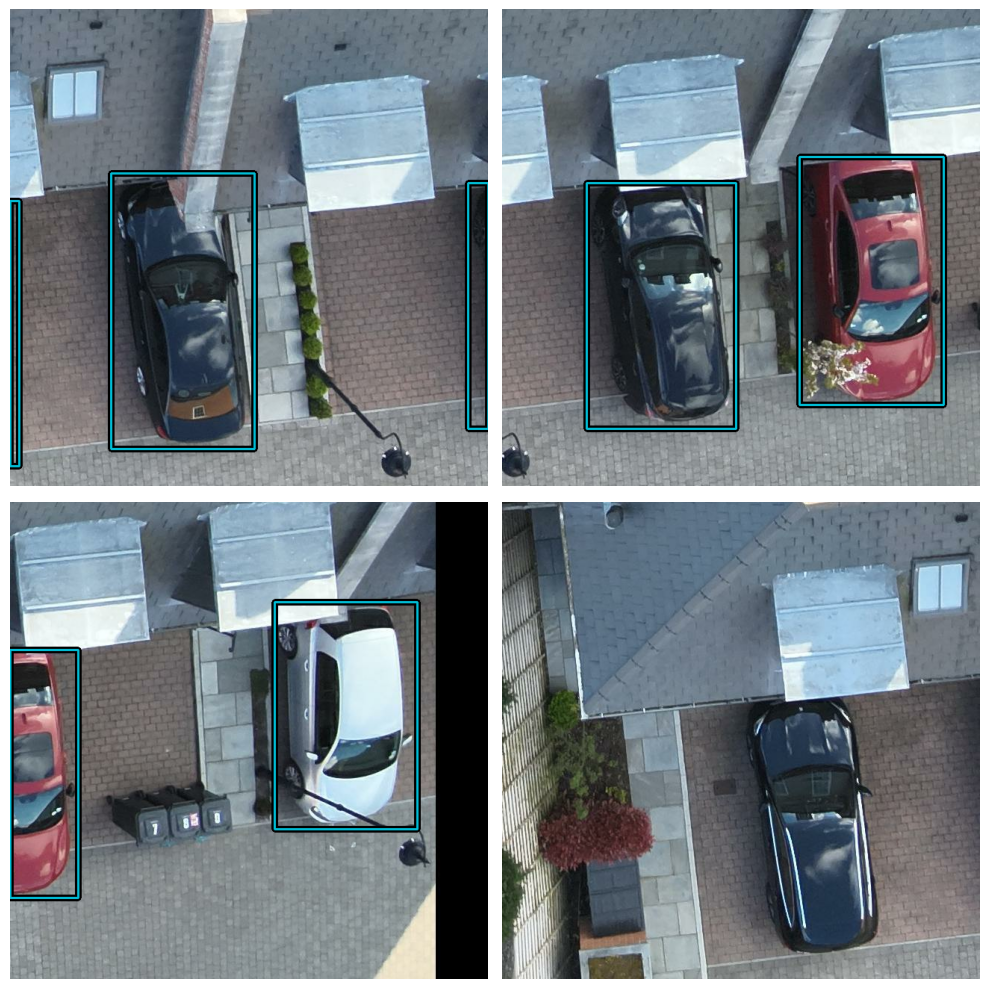

In [22]:
visualize_bounding_box(path)